#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [78]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [79]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Solve tasks

### 1. Basic Data Exploration

In [80]:
num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 148654
Number of columns: 13


In [81]:
#To determine the data types of each column
column_types = df.dtypes

print(column_types)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [82]:
#check for missing values in each column
missing_values = df.isnull().sum()

print('Number of missing values in each column')
print(missing_values)

Number of missing values in each column
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


## 2. Descriptive Statistics

In [83]:
# Calculate mean, median, mode
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]

# Calculate minimum and maximum salary
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

# Calculate range of salaries
salary_range = max_salary - min_salary

# Calculate standard deviation
std_salary = df['TotalPay'].std()

print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)
print("Range of salaries:", salary_range)
print("Standard deviation of salaries:", std_salary)

Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode salary: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43
Range of salaries: 568213.56
Standard deviation of salaries: 50517.00527394987


In [84]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

## 3. Data Cleaning

### drop unnessary columns

In [85]:
#  drop Status and Notes  columns from df
df = df.drop(['Status', 'Notes','Agency'], axis=1)

### fill BasePay

In [86]:
base = df['TotalPay'] - (df['OtherPay'] + df['OvertimePay'])
df['BasePay'].fillna(base, inplace=True)


### fill Benefits

In [87]:
Benef = df['TotalPayBenefits'] - df['TotalPay']
df['Benefits'].fillna(Benef, inplace=True)

### Drop rows

In [88]:
df.dropna(subset=['OvertimePay', 'OtherPay'], inplace=True)

### Drop unnessesary rows

In [89]:
# delete rows where the value of `TotalPayBenefits` is equal to 0
df = df[df['TotalPayBenefits'] != 0]

### Remove outlires

In [90]:
df = df[(df['TotalPay'] >= 0) & (df['TotalPay'] <= 500000)]

### check for missing values in each column after handeling

In [91]:
#check for missing values in each column
missing_values = df.isnull().sum()

print('Number of missing values in each column after handeling')
print(missing_values)

Number of missing values in each column after handeling
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


## 4. Basic Data Visualization

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

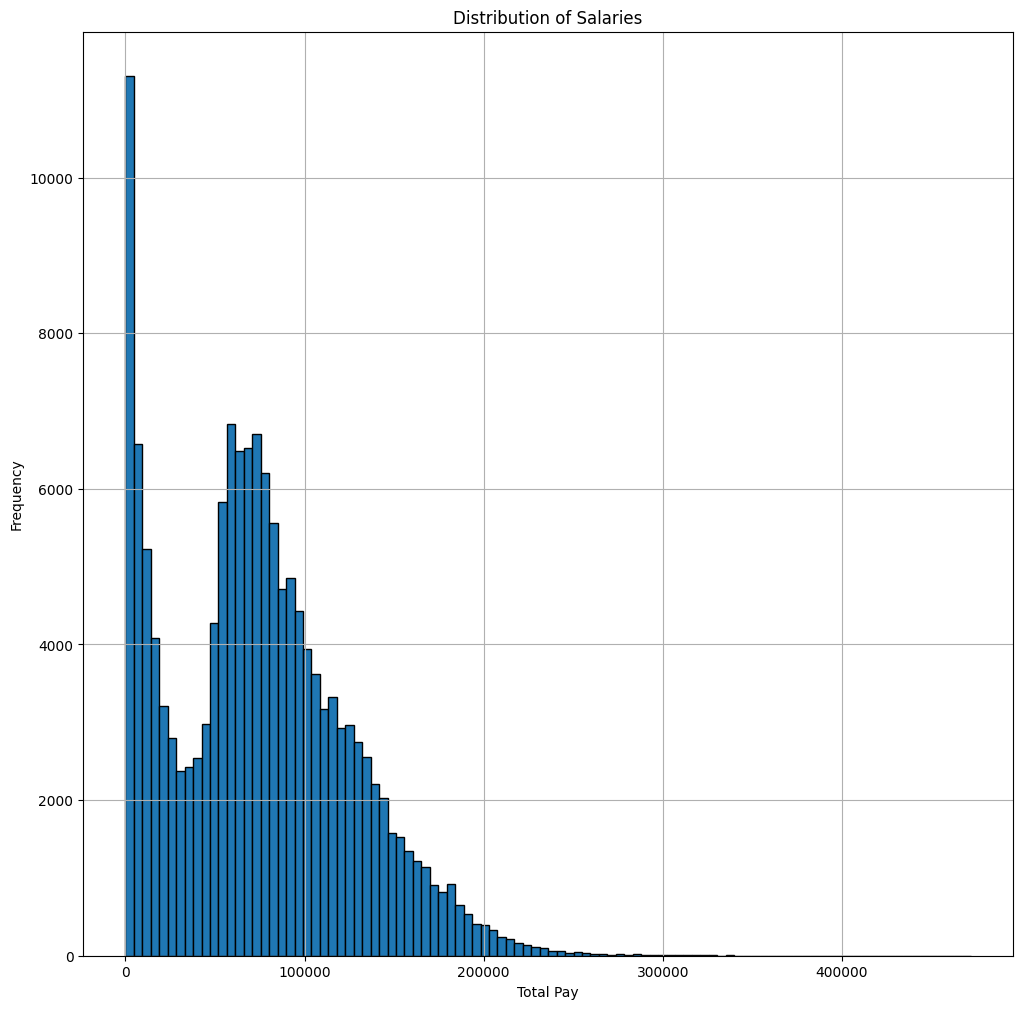

In [92]:
plt.figure(figsize=(12, 12))  # Adjust the figure size for better visibility
df['TotalPay'].plot.hist(bins=100, edgecolor='black')  # Add edgecolor for clearer bins
plt.xlabel('Total Pay')  # Add an x-axis label
plt.ylabel('Frequency')  # Add a y-axis label
plt.title('Distribution of Salaries')  # Add a title to the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot

In [93]:
df['JobTitle'].value_counts()

Transit Operator                          7036
Special Nurse                             4389
Registered Nurse                          3736
Public Svc Aide-Public Works              2518
Police Officer 3                          2421
                                          ... 
PAINTER SUPERVISOR II                        1
CHIEF DISTRICT ATTORNEY'S INVESTIGATOR       1
TRAF SIGNAL ELECTRICIAN SUP I                1
TREASURER                                    1
Cashier 3                                    1
Name: JobTitle, Length: 2158, dtype: int64

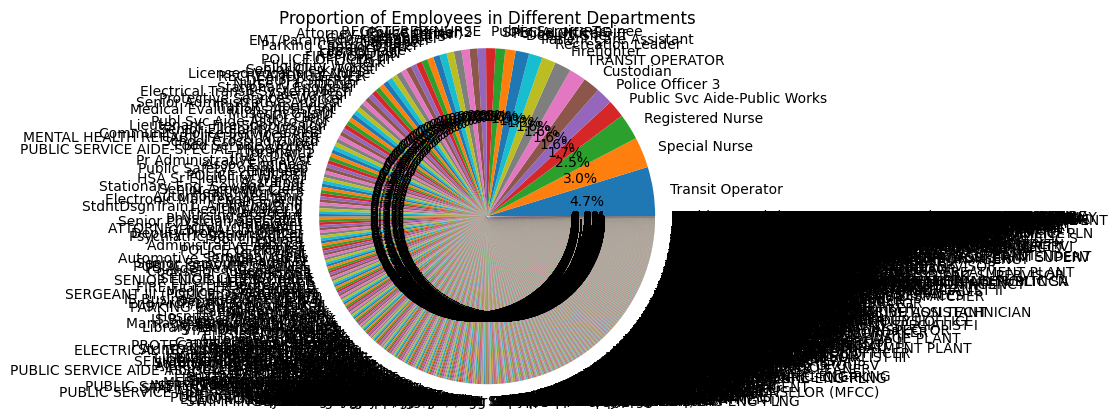

In [94]:
import matplotlib.pyplot as plt
department_counts = df['JobTitle'].value_counts()
labels = department_counts.index.tolist()
sizes = department_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Employees in Different Departments')

plt.show()

### Group smaller departments to simplify the chart

<ipython-input-95-a258e9d79052>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_department_counts = top_departments.append(pd.Series({'Other': other_departments_count}))


<Axes: >

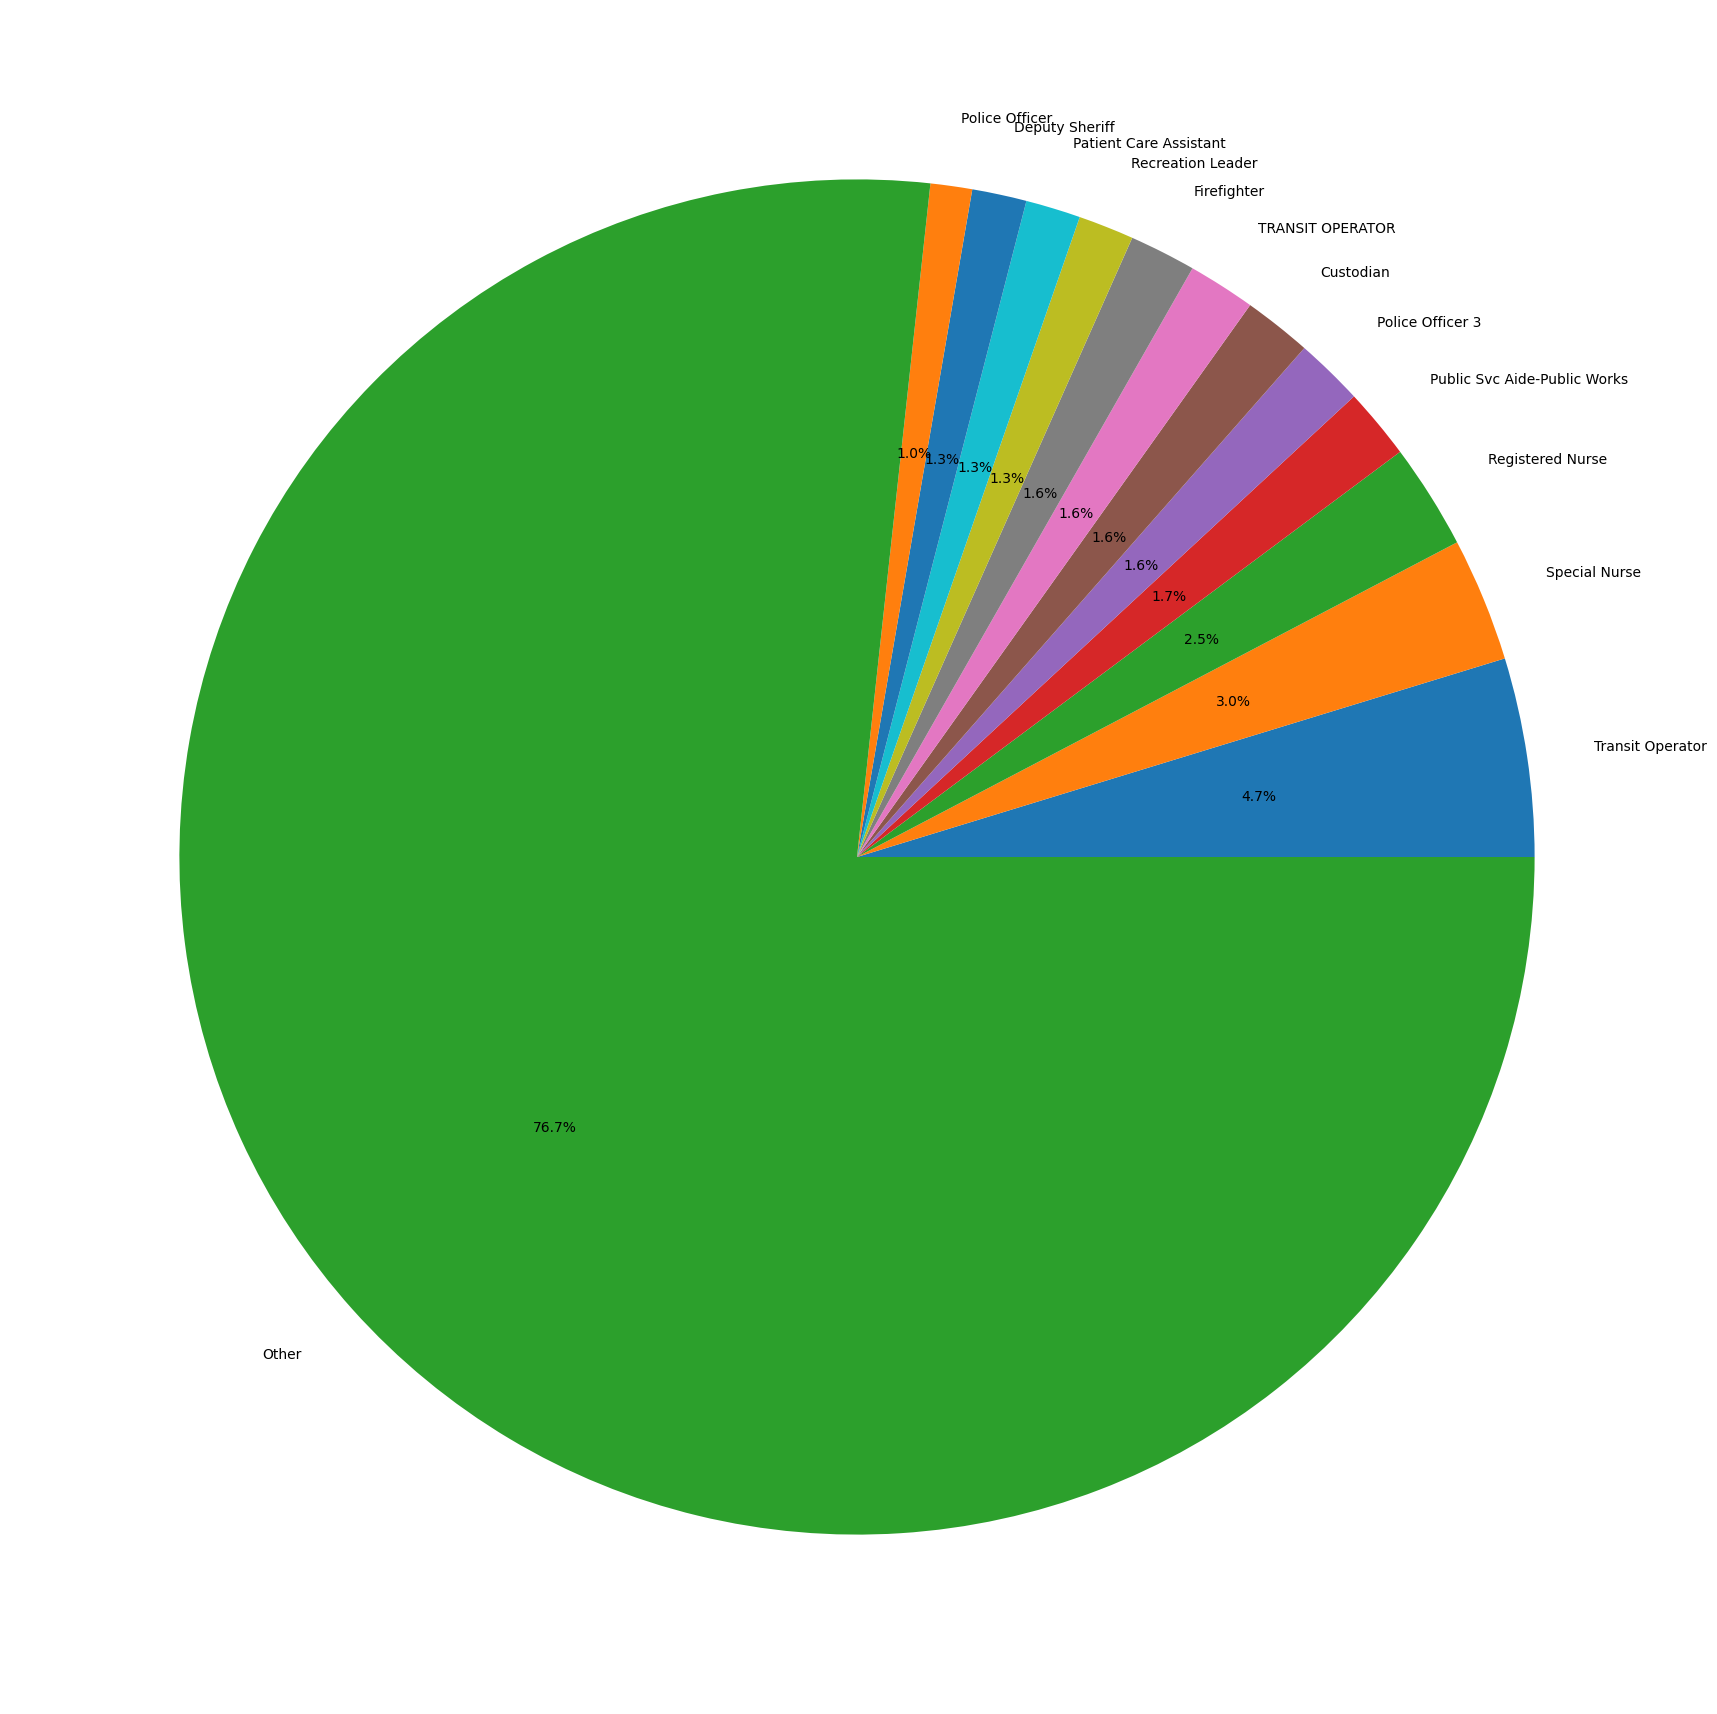

In [95]:
# Group smaller departments to simplify the chart
department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(12)  # Select the top 5 departments

# Calculate the sum of employees in smaller departments
other_departments_count = department_counts[12:].sum()

# Create a new DataFrame with the top departments and the "Other" category
new_department_counts = top_departments.append(pd.Series({'Other': other_departments_count}))

# Plot the pie chart with labels and percentages
new_department_counts.plot(kind='pie', figsize=(22, 22), labels=new_department_counts.index, autopct='%1.1f%%')

## 5. Grouped Analysis

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups

In [96]:
summary_stats = df.groupby('JobTitle')[['TotalPay','BasePay']].mean()

In [97]:
summary_stats

,TotalPay,BasePay
JobTitle,,
ACCOUNT CLERK,44035.664337,43300.806506
ACCOUNTANT,47429.268000,46643.172000
ACCOUNTANT INTERN,29031.742917,28732.663958
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.780000
ACUPUNCTURIST,67594.400000,66374.400000
...,...,...
X-RAY LABORATORY AIDE,52705.880385,47664.773077
X-Ray Laboratory Aide,50823.942700,46086.387100
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000,52609.910000


In [98]:
summary_stats = df.groupby(['JobTitle','Year'])[['TotalPay','BasePay']].mean()

In [99]:
summary_stats

TotalPay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  44035.664337   
ACCOUNTANT                                     2011  47429.268000   
ACCOUNTANT INTERN                              2011  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  67594.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  53632.870000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  35823.295000   
                                               2014  36465.910000   
ZOO CURATOR                                    2011  66686.560000   

                                                          BasePay  
JobTitle                                       Year                
ACCOUNT CLERK                                  2011  43300.806506  
ACCOUNTANT                                     2011  46643.172000  
ACCOUNTANT INTERN                              2011  28732.663958  
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000  
ACUPUNCTURIST                                  2011  66374.400000  
...                                                           ...  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000  
Youth Comm Advisor                             2012  57544.730000  
                                               2013  33174.840000  
                                               2014  32417.420000  
ZOO CURATOR                                    2011  43148.000000  

[4136 rows x 2 columns]

In [100]:
summary_stats.describe()

,TotalPay,BasePay
count,4136.000000,4136.000000
mean,87661.827168,80757.820010
std,47287.713188,42848.994164
min,0.000000,0.000000
25%,58921.454783,55577.648462
50%,80407.228000,75120.141714
75%,108208.757885,99307.772941
max,339653.700000,319275.010000


## 6. Simple Correlation Analysis

Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

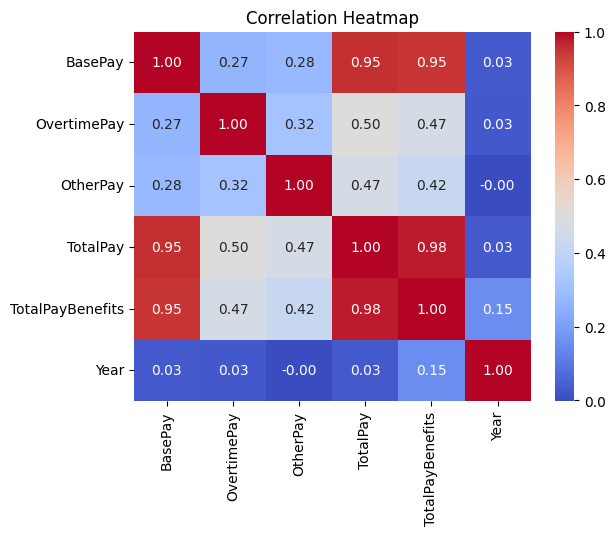

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the mentioned columns
data = df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [102]:
correlation = df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPayBenefits', 'Year']].corrwith(df['TotalPay'])
correlation

BasePay             0.954996
OvertimePay         0.504634
OtherPay            0.470793
TotalPayBenefits    0.977312
Year                0.032626
dtype: float64

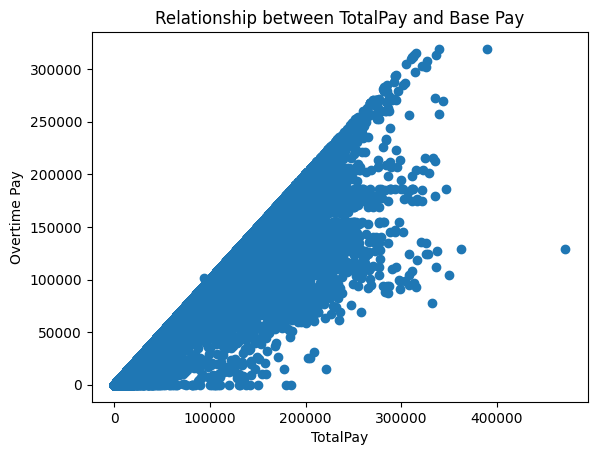

In [103]:
plt.scatter(df['TotalPay'], df['BasePay'])
plt.xlabel('TotalPay')
plt.ylabel('Overtime Pay')
plt.title('Relationship between TotalPay and Base Pay')
plt.show()

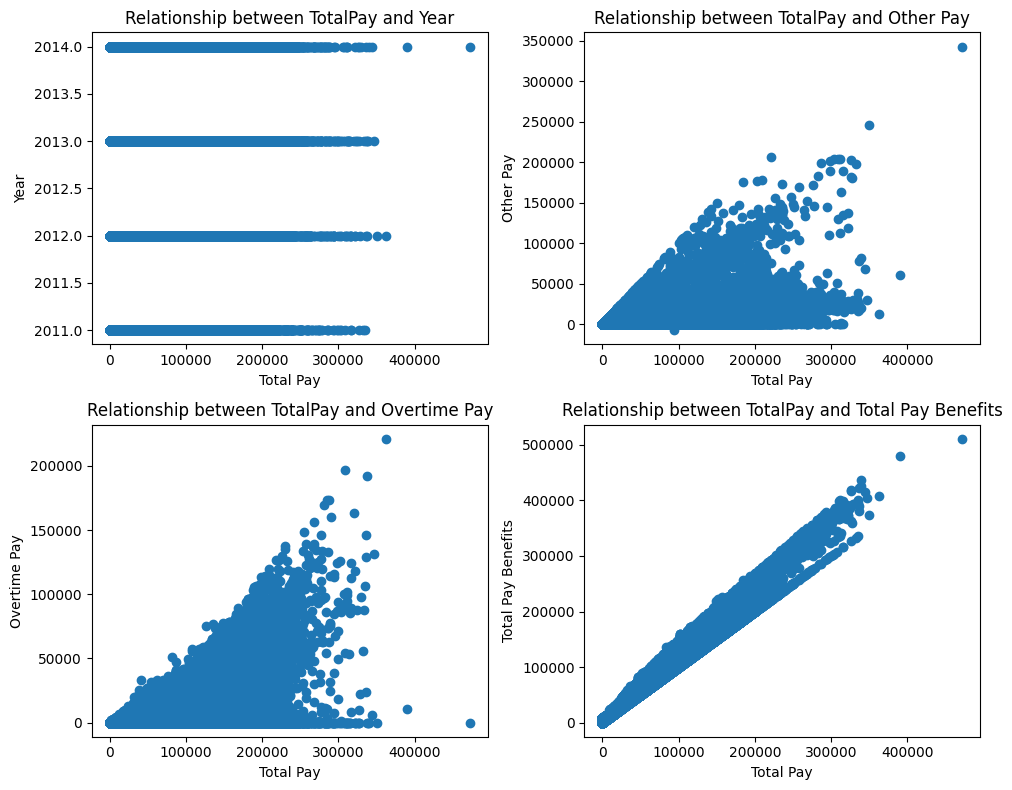

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].scatter(df['TotalPay'], df['Year'])
axs[0, 0].set_xlabel('Total Pay')
axs[0, 0].set_ylabel('Year')
axs[0, 0].set_title('Relationship between TotalPay and Year')

# Plot 2
axs[0, 1].scatter(df['TotalPay'], df['OtherPay'])
axs[0, 1].set_xlabel('Total Pay')
axs[0, 1].set_ylabel('Other Pay')
axs[0, 1].set_title('Relationship between TotalPay and Other Pay')

# Plot 3
axs[1, 0].scatter(df['TotalPay'], df['OvertimePay'])
axs[1, 0].set_xlabel('Total Pay')
axs[1, 0].set_ylabel('Overtime Pay')
axs[1, 0].set_title('Relationship between TotalPay and Overtime Pay')

# Plot 4
axs[1, 1].scatter(df['TotalPay'], df['TotalPayBenefits'])
axs[1, 1].set_xlabel('Total Pay')
axs[1, 1].set_ylabel('Total Pay Benefits')
axs[1, 1].set_title('Relationship between TotalPay and Total Pay Benefits')

plt.tight_layout()
plt.show()

## 7. Summary of Insights

Write a brief report summarizing the findings and insights from the analyses.

1. The columns 'Status', 'Notes', and 'Agency' are unnecessary for analysis. Since 'Status' and 'Notes' are completely empty, and 'Agency' has the same value for all rows, it makes sense to drop these columns.

2. Missing Values in Benefits: To handle missing values in the 'Benefits' column, we filled them with the corresponding values from the calculation 'TotalPayBenefits - TotalPay'. This ensures that the missing values are replaced with a representative value, allowing for a more complete analysis of the dataset.

3. Missing Values in BasePay: any missing values in the 'BasePay' column will be replaced with the corresponding values from the calculation 'TotalPay - (OtherPay + OvertimePay)'

4. drop the unnecessary rows that have df['TotalPayBenefits'] equal to 0, because those rows might represent missing or incorrect data. By removing them, we can ensure that the analysis is based on valid and meaningful information.

5. filtering the DataFrame `df` from outliers using the condition `(df['TotalPay'] >= 0) & (df['TotalPay'] <= 500000)`, to ensuring that keep the rows where the 'TotalPay' values are greater than or equal to 0 and less than or equal to 500,000. This will help us to focus on the relevant data for analysis and remove any outliers or incorrect values.

6. Salary Distribution: The histogram visualization of salaries shows that the majority of salaries fall within a certain range, with a peak around a specific value. This suggests that there might be a common salary range for the positions in the dataset.

7. Average Salaries by Job Title: The bar chart comparing average salaries across different job titles reveals variations in compensation. Some job titles have higher average salaries, while others have lower averages. This information can help identify potential salary differences based on job titles.

8. Describe correlation between salary and another numerical column:
- BasePay: There is a strong positive correlation of approximately 0.95 between BasePay and Salary. This suggests that as the BasePay increases, the Salary tends to increase as well.

- OvertimePay: There is a moderate positive correlation of around 0.50 between OvertimePay and Salary. This indicates that there is a tendency for higher OvertimePay to be associated with higher Salaries.

- OtherPay: There is a moderate positive correlation of about 0.47 between OtherPay and Salary. This means that there is a tendency for higher OtherPay to be associated with higher Salaries.

- TotalPayBenefits: There is a very strong positive correlation of approximately 0.98 between TotalPayBenefits and Salary. This indicates that as the TotalPayBenefits increase, the Salary also tends to increase significantly.

- Year: There is a weak positive correlation of about 0.03 between Year and Salary. This suggests that there is a slight tendency for Salary to increase slightly over the years, but the relationship is not very strong.

# Good Luck!